# TQC 人工智慧 機器學習 證照 攻略 (上)
## 第一類監督學習 解題分享 (4/5)

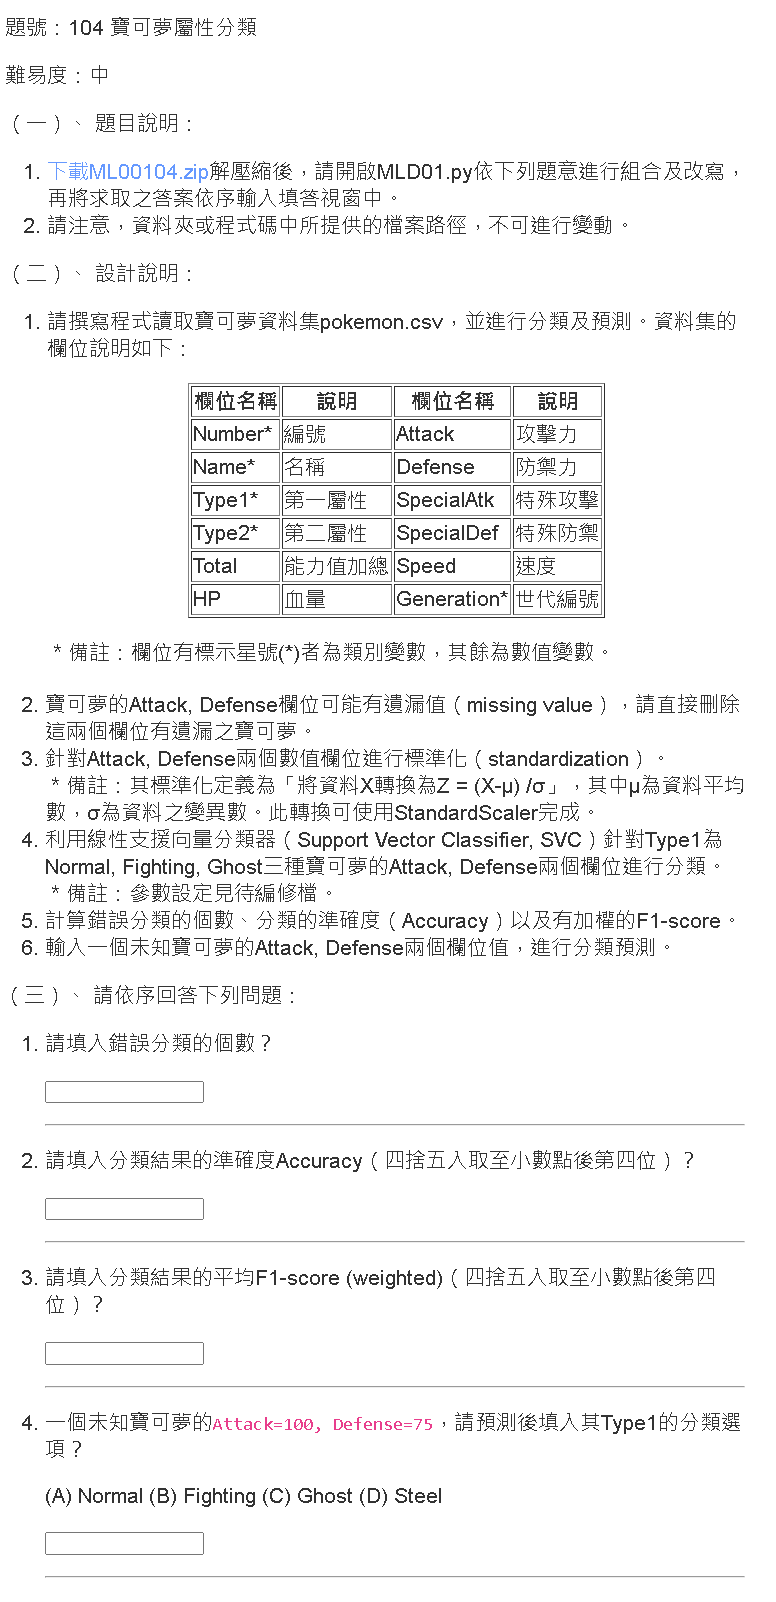

In [1]:
import pandas as pd
# 載入寶可夢資料集
data = pd.read_csv('pokemon.csv')
df = data.copy()
# 處理遺漏值
features = ['Attack', 'Defense']
df.dropna(subset=features, inplace=True)
# 取出目標寶可夢的 Type1 與兩個特徵欄位
mask = (df.Type1=='Normal')|(df.Type1=='Fighting')|(df.Type1=='Ghost')
df = df[mask]
X = df.loc[:, features]
y = df.loc[:, 'Type1']
# 編碼 Type1
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder().fit(y)
y = le.transform(y)

# 特徵標準化
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# 建立線性支援向量分類器，除以下參數設定外，其餘為預設值
# #############################################################################
# C=0.1, dual=False, class_weight='balanced'
# #############################################################################
from sklearn.svm import LinearSVC
model = LinearSVC(C=0.1, dual=False, class_weight='balanced')
model.fit(X, y)
y_pred = model.predict(X)
# 計算分類錯誤的數量
error_num = (y_pred!=y).sum()
print(f"error_num: {error_num}")

# 計算準確度(accuracy)
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {Accuracy:.4f}')

# 計算有加權的 F1-score (weighted)
from sklearn.metrics import f1_score
F1 = f1_score(y, y_pred, average='weighted')
print(f'F1-score: {F1:.4f}')

# 預測未知寶可夢的 Type1
inp= [[100,75]]
inp_pred = model.predict(inp)
label = le.inverse_transform(inp_pred)
print(f"label: {label[0]}")

error_num: 35
Accuracy: 0.7586
F1-score: 0.7578
label: Fighting
